<a href="https://colab.research.google.com/github/pritammoreybtech/Machine_Learning_Project/blob/main/creditcard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load and Explore

In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Step 2: Load dataset
df = pd.read_csv("creditcard.csv")   # place the CSV file in your working directory

# Step 3: Basic data info
print("Shape of dataset:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nDataset Info:\n")
print(df.info())

# Step 4: Check for missing values
print("\nMissing values in each column:\n", df.isnull().sum())

# Step 5: Display first few rows
df.head()

Shape of dataset: (284807, 31)

Columns: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']

Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Dataset description

| **Column Name** | **Description**                                                                |
| --------------- | ------------------------------------------------------------------------------ |
| `Time`          | Seconds elapsed between this transaction and the first transaction.            |
| `V1–V28`        | Principal components obtained via PCA transformation (actual features hidden). |
| `Amount`        | Transaction amount (useful for normalization).                                 |
| `Class`         | Target variable — 1 = Fraudulent, 0 = Legitimate.                              |


Data Analysis & Preprocessing\
EDA + Preprocessing

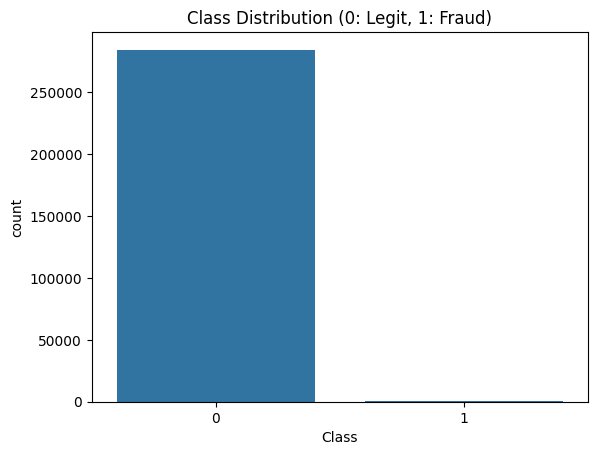

Fraudulent transactions: 492
Legitimate transactions: 284315
Fraud %: 0.1727485630620034
Train: (227845, 30) Test: (56962, 30)


In [ ]:
# Step 1: Check distribution of target variable
sns.countplot(x='Class', data=df)
plt.title('Class Distribution (0: Legit, 1: Fraud)')
plt.show()

fraud_cases = df[df['Class'] == 1]
non_fraud_cases = df[df['Class'] == 0]
print("Fraudulent transactions:", len(fraud_cases))
print("Legitimate transactions:", len(non_fraud_cases))
print("Fraud %:", (len(fraud_cases) / len(df)) * 100)

# Step 2: Scale 'Amount' and 'Time' columns
scaler = StandardScaler()
df['scaled_amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['scaled_time'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))
df.drop(['Time', 'Amount'], axis=1, inplace=True)

# Step 3: Separate features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Train:", X_train.shape, "Test:", X_test.shape)

Model Training


1.   Logistic Regression
2.   Random Forest
1.   XGBoost





Logistic Regression

In [ ]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

print("Logistic Regression Results:\n")
print(classification_report(y_test, y_pred_log))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_log))

Logistic Regression Results:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.64      0.72        98

    accuracy                           1.00     56962
   macro avg       0.91      0.82      0.86     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC: 0.8213142636063991


Random Forest

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Random Forest Results:\n")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_rf))

Random Forest Results:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.82      0.87        98

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC: 0.9081193007591333


XGBoost

In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Results:\n")
print(classification_report(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_xgb))

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [07:16:27] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Results:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.80      0.83        98

    accuracy                           1.00     56962
   macro avg       0.93      0.90      0.91     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC: 0.8978536687606951


Evaluation and Visualization

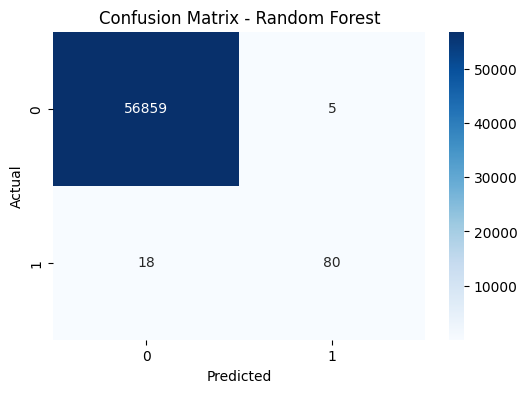

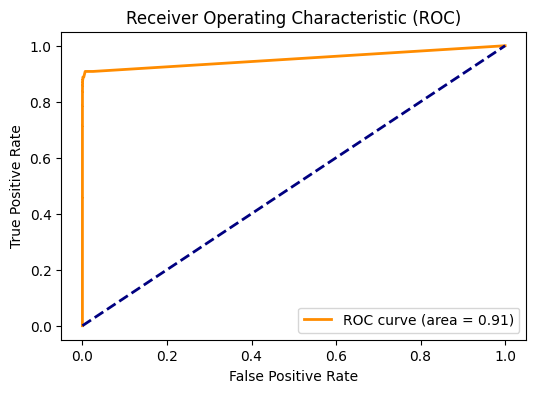

In [ ]:
# Confusion Matrix for Random Forest
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_pred_rf))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Receiver Operating Characteristic (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Comparing results from each model
results = {
    "Logistic Regression": classification_report(y_test, y_pred_log, output_dict=True),
    "Random Forest": classification_report(y_test, y_pred_rf, output_dict=True),
    "XGBoost": classification_report(y_test, y_pred_xgb, output_dict=True)
}

# Convert to DataFrame for better visualization
results_df = pd.DataFrame()
for model_name, report in results.items():
    report_df = pd.DataFrame(report).transpose()
    report_df['Model'] = model_name
    results_df = pd.concat([results_df, report_df])

# Display the table
display(results_df)

,precision,recall,f1-score,support,Model
0,0.999385,0.999771,0.999578,56864.000000,Logistic Regression
1,0.828947,0.642857,0.724138,98.000000,Logistic Regression
accuracy,0.999157,0.999157,0.999157,0.999157,Logistic Regression
macro avg,0.914166,0.821314,0.861858,56962.000000,Logistic Regression
weighted avg,0.999092,0.999157,0.999104,56962.000000,Logistic Regression
0,0.999684,0.999912,0.999798,56864.000000,Random Forest
1,0.941176,0.816327,0.874317,98.000000,Random Forest
accuracy,0.999596,0.999596,0.999596,0.999596,Random Forest
macro avg,0.970430,0.908119,0.937057,56962.000000,Random Forest
weighted avg,0.999583,0.999596,0.999582,56962.000000,Random Forest


Comparative Analysis & Visualizations

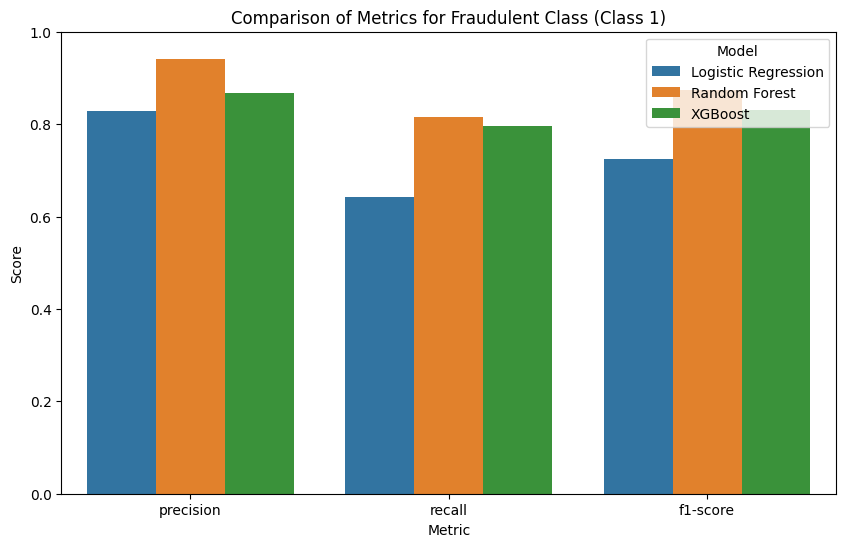

In [ ]:
# Filter for Class 1 metrics
class_1_metrics = results_df[results_df.index == '1'].melt(id_vars=['Model'], value_vars=['precision', 'recall', 'f1-score'], var_name='Metric', value_name='Score')

# Plot the comparison of metrics for Class 1
plt.figure(figsize=(10, 6))
sns.barplot(x='Metric', y='Score', hue='Model', data=class_1_metrics)
plt.title('Comparison of Metrics for Fraudulent Class (Class 1)')
plt.ylabel('Score')
plt.ylim(0, 1) # Metrics are between 0 and 1
plt.show()